##Họ và tên: Thành Thiện Nhân
##Mã số sinh viên: 21127535

Import libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Function to print menu

In [2]:
def print_menu():
    print('0. Run All Below Functions')
    print('1. Change Brightness')
    print('2. Change Contrast')
    print('3. Flip Image Horizontal/Vertical')
    print('4. Change Image into Grayscale/Sepia')
    print('5. Blur/Sharpen the Image')
    print('6. Crop Image (at center)')
    print('7. Crop Image in Circle')
    print('8. Crop Image in Two Ellipses')

Input function number

In [3]:
def input_function_num():
    while True:
       try:
          function_num = int(input('Please input function number (from 0 to 8): '))
          if(function_num>=0 and function_num<=8):
              break
          else:
              print('Invalid input! Function number is not in valid range!')
       except ValueError:
          print('Invalid input! Please enter a valid function number.')
    return function_num

Ask user to input 1 or 2

In [4]:
def input_1_or_2(Option1,Option2):
      while True:
            try:
                print('1. '+Option1)
                print('2. '+Option2)
                choice = int(input('Please input your choice (1 or 2): '))
                if(choice==1 or choice==2):
                   break
                else:
                    print('Invalid input! Please try again!')
            except ValueError:
               print('Invalid input! Please enter a valid function number.')
      return choice

1. Change brightness

In [5]:
def change_brightness(img_input, bias=50):
    img_output= img_input.astype('uint16')
    img_output=  img_output + bias
    img_output = np.clip(img_output,0,255)
    return img_output.astype('uint8')

2. Change contrast

In [6]:
def change_contrast(img_input, alpha=50):
    img_output = img_input.astype('float32')
    factor = (259 * (alpha + 255)) / (255 * (259 - alpha)) # Calculate the adjustment factor based on the alpha value
    img_output = factor * (img_output - 128) + 128 # Adjust the image contrast
    img_output = np.clip(img_output, 0, 255)
    return img_output.astype('uint8')

3. Flip image (Horizontal/Vertical)

In [7]:
def flip_image(img_input, style):
    if style == 'horizontal':
        img_output = np.flip(img_input, axis=1)
    elif style == 'vertical':
        img_output = np.flip(img_input, axis=0)

    return img_output.astype('uint8')

4. Turn image into Grayscale/Sepia

In [8]:
def grayscale_sepia(img_input, style):
    row = img_input.shape[0]
    column = img_input.shape[1]
    num_channels = img_input.shape[2] #rgb image will have 3 channels
    temp = img_input.reshape(row * column, num_channels)
    r, g, b = temp[:, 0], temp[:, 1], temp[:, 2]

    if style == 'grayscale':
        img_output = 0.299 * r + 0.587 * g + 0.114 * b
        img_output = np.clip(img_output, 0, 255)
        img_output = img_output.reshape(row, column, 1)
        img_output = np.dstack((img_output,img_output,img_output))

    if style == 'sepia':
        sepia_r = (r * 0.393) + (g * 0.769) + (b * 0.189)
        sepia_g = (r * 0.349) + (g * 0.686) + (b * 0.168)
        sepia_b = (r * 0.272) + (g * 0.534) + (b * 0.131)
        sepia_r = np.clip(sepia_r, 0, 255)
        sepia_g = np.clip(sepia_g, 0, 255)
        sepia_b = np.clip(sepia_b, 0, 255)
        img_output = np.dstack((sepia_r, sepia_g, sepia_b))
        img_output = img_output.reshape((row, column,num_channels))
    return img_output.astype('uint8')

5. Blur/Sharpen image

In [9]:
def blur_sharpen(img_input, style,kernel_size=5):
    row = img_input.shape[0]
    column = img_input.shape[1]
    num_channels = img_input.shape[2] #rgb image will have 3 channels
    padding = (kernel_size - 1) // 2
    img_output = np.zeros_like(img_input)

    if style == 'blur':
        for i in range(0,row):
            for j in range(0,column):
                kernel = img_input[max(0, i-padding):min(i+padding+1, row),
                                max(0, j-padding):min(j+padding+1, column), :]
                img_output[i, j] = np.mean(kernel, axis=(0, 1))

    if style == 'sharpen':
        for i in range(0,row):
            for j in range(column):
                kernel = img_input[max(0, i-padding):min(i+padding+1, row),
                                max(0, j-padding):min(j+padding+1, column), :]
                blurred = np.mean(kernel, axis=(0, 1))
                sharpened = img_input[i, j] + (img_input[i, j] - blurred)
                img_output[i, j] = np.clip(sharpened, 0, 255)

    return img_output.astype('uint8')

6. Crop center

In [10]:
def crop_center(img_input):
    img_height, img_width = img_input.shape[:2]
    crop_width = img_width // 2
    crop_height = img_height // 2
    start_x = (img_width - crop_width) // 2
    start_y = (img_height - crop_height) // 2
    img_output = img_input[start_y:start_y+crop_height, start_x:start_x+crop_width]

    return img_output.astype('uint8')

7. Crop in Circle

In [11]:
def crop_circle(img_input):
    img_height, img_width = img_input.shape[:2]
    center_x = img_width // 2
    center_y = img_height // 2
    radius = min(center_x, center_y)
    y_indices, x_indices = np.indices((img_height, img_width)) # Create meshgrid of indices for x and y coordinates

    distances = np.sqrt((x_indices - center_x) ** 2 + (y_indices - center_y) ** 2) # Calculate the Euclidean distance of each point from the center

    mask = distances <= radius # Create a mask to select the points inside the circle
    img_output = np.zeros_like(img_input) # Create an output image with a black background
    img_output[mask] = img_input[mask]  # Apply the mask to the image (copy the pixels from the input image where the mask is True)

    return img_output.astype('uint8')

8. Crop in two Ellipses

In [12]:
def inverse_tan(x): #Find arctan
    total = 0
    power = x
    for i in range(1, 100):
        if i % 2 == 0:
            total -= power / i
        else:
            total += power / i
        power *= x**2
    return total

def crop_ellipses(img_input): #rotate 2 ellipse by alpha radian
    img_height, img_width, num_channels = img_input.shape

    ellipse1_center_x = img_width // 2
    ellipse1_center_y = img_height // 2
    ellipse1_radius_x = min(ellipse1_center_x, ellipse1_center_y) // 2
    ellipse1_radius_y = min(ellipse1_center_x, ellipse1_center_y)

    ellipse2_center_x = img_width // 2
    ellipse2_center_y = img_height // 2
    ellipse2_radius_x = min(ellipse2_center_x, ellipse2_center_y) //2
    ellipse2_radius_y = min(ellipse2_center_x, ellipse2_center_y)

    y_indices, x_indices = np.indices((img_height, img_width)) # Create a meshgrid of indices for x and y coordinates

    #Make alpha value to rotate (in radian unit)
    half_height=img_height // 2
    half_width=img_width // 2
    tan_alpha=float(half_width)/half_height
    alpha=inverse_tan(tan_alpha)

    #Equaltions for the two ellipses (without rotation)
    # ellipse1 = ((x_indices - ellipse1_center_x) ** 2) / (ellipse1_radius_x ** 2) + (
    #             (y_indices - ellipse1_center_y) ** 2) / (ellipse1_radius_y ** 2)
    # ellipse2 = ((x_indices - ellipse2_center_x) ** 2) / (ellipse2_radius_x ** 2) + (
    #             (y_indices - ellipse2_center_y) ** 2) / (ellipse2_radius_y ** 2)


    # Calculate the equations for the two ellipses with a rotation of alpha radian
    ellipse1 = (((x_indices - ellipse1_center_x) * np.cos(alpha) + (y_indices - ellipse1_center_y) * np.sin(alpha)) ** 2) / (ellipse1_radius_x ** 2) + (
        ((y_indices - ellipse1_center_y) * np.cos(alpha) - (x_indices - ellipse1_center_x) * np.sin(alpha)) ** 2) / (ellipse1_radius_y ** 2)
    ellipse2 = (((x_indices - ellipse2_center_x) * np.cos(-alpha) + (y_indices - ellipse2_center_y) * np.sin(-alpha)) ** 2) / (ellipse2_radius_x ** 2) + (
        ((y_indices - ellipse2_center_y) * np.cos(-alpha) - (x_indices - ellipse2_center_x) * np.sin(-alpha)) ** 2) / (ellipse2_radius_y ** 2)

    img_output = np.zeros_like(img_input)
    mask = (ellipse1 <= 1) | (ellipse2 <= 1) #Create a mask to select the points inside the ellipses
    img_output[mask] = img_input[mask] #Copy the pixels from the input image where the mask is True

    return img_output.astype('uint8')

Compare image Before/After using the program

In [13]:
def plot_image(Before,After):
      fig,ax=plt.subplots(1,2) #make a figure with 2 subplots (1 row, 2 columns)
      Img1=ax[0].imshow(Before)
      Img2=ax[1].imshow(After)
      for i in range(0,2):
          title=['Before','After']
          ax[i].set_title(title[i])

Case: Run one function

In [14]:
def run_one_function(img_input,function_num):
    choice=0
    img_output=img_input

    if function_num==1:
        img_output=change_brightness(img_input)
    elif function_num==2:
        img_output=change_contrast(img_input)
    elif function_num==3:
        choice=input_1_or_2('Flip horizontal','Flip vertical')
        if choice==1:
            img_output=flip_image(img_input,'horizontal')
        if choice==2:
            img_output=flip_image(img_input,'vertical')
    elif function_num==4:
        choice=input_1_or_2('Change to grayscale image','Change to sepia image')
        if choice==1:
            img_output=grayscale_sepia(img_input,'grayscale')
        if choice==2:
            img_output=grayscale_sepia(img_input,'sepia')
    elif function_num==5:
        choice=input_1_or_2('Blur image','Sharpen image')
        if choice==1:
            img_output = blur_sharpen(img_input,'blur')
        if choice==2:
            img_output = blur_sharpen(img_input,'sharpen')
    elif function_num==6:
        img_output=crop_center(img_input)
    elif function_num==7:
        img_output=crop_circle(img_input)
    elif function_num==8:
        img_output=crop_ellipses(img_input)
    return img_output,choice

Save one image from that case

In [15]:
def save_one_image(img_name,img_output, function_num,choice):
    filename = img_name.rsplit('.', 1)[0]
    extension = img_name.rsplit('.', 1)[1]
    temp=''
    if function_num==1:
        temp='_brightness'
    elif function_num==2:
        temp='_contrast'
    elif function_num==3:
        if choice==1:
            temp='_horizontal'
        if choice==2:
            temp='_vertical'
    elif function_num==4:
        if choice==1:
            temp='_grayscale'
        if choice==2:
            temp='_sepia'
    elif function_num==5:
        if choice==1:
            temp='_blur'
        if choice==2:
            temp='_sharpen'
    elif function_num==6:
        temp='_cropcenter'
    elif function_num==7:
        temp='_cropcircle'
    elif function_num==8:
        temp='_cropellipses'
    plt.imsave(filename+temp+'.'+extension, img_output)

Case: Run all functions

In [16]:
def run_all_function(img_input):
    img_output=[]
    img_output.append(change_brightness(img_input))
    img_output.append(change_contrast(img_input))
    img_output.append(flip_image(img_input, 'horizontal'))
    img_output.append(flip_image(img_input, 'vertical'))
    img_output.append(grayscale_sepia(img_input, 'grayscale'))
    img_output.append(grayscale_sepia(img_input, 'sepia'))
    img_output.append(blur_sharpen(img_input,'blur'))
    img_output.append(blur_sharpen(img_input,'sharpen'))
    img_output.append(crop_center(img_input))
    img_output.append(crop_circle(img_input))
    img_output.append(crop_ellipses(img_input))
    return img_output

Save all images from that case

In [17]:
def save_all_image(img_name,img_output):
    filename = img_name.rsplit('.', 1)[0]
    extension = img_name.rsplit('.', 1)[1]
    temp = ['_brightness', '_contrast', '_horizontal', '_vertical',
            '_grayscale', '_sepia', '_blur', '_sharpen', '_cropcenter', '_cropcircle','_cropellipses']
    for i in range(0,len(img_output)):
        plt.imsave(filename+temp[i]+'.'+extension, img_output[i])

Main function

0. Run All Below Functions
1. Change Brightness
2. Change Contrast
3. Flip Image Horizontal/Vertical
4. Change Image into Grayscale/Sepia
5. Blur/Sharpen the Image
6. Crop Image (at center)
7. Crop Image in Circle
8. Crop Image in Two Ellipses


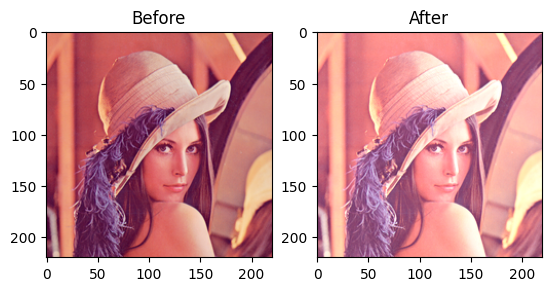

In [18]:
if __name__ == '__main__':
    img_name=str(input('Please input the name of the image (for example: image.jpg): '))
    img_input = Image.open(img_name)
    img_input = img_input.convert("RGB") #remove alpha channel (if the image has alpha channel)
    img_input = np.asarray(img_input) #Make a 3-dimension array
    print_menu()
    function_num=input_function_num()
    if function_num!=0: #from 1 to 7
        img_output,choice=run_one_function(img_input,function_num)
        save_one_image(img_name,img_output,function_num,choice)
        plot_image(img_input,img_output)

    elif function_num==0: #run all function case
        img_output= run_all_function(img_input)
        save_all_image(img_name,img_output)
        print('Complete running all functions! Please check the output files.')